In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_goodread_df = pd.read_csv('corrected_goodread_df.csv', error_bad_lines = False)
original_goodread_df.head()

,bookID,title,author,average_rating,isbn,isbn13,language_code,num_pages,audio_hrs,ratings_count,text_reviews_count,publication_date,publisher,series
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,439785960,9.780440e+12,eng,652,0.0,2095690,27591,2006-09-16,Scholastic Inc.,True
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,439358078,9.780439e+12,eng,870,0.0,2153167,29221,2004-09-01,Scholastic Inc.,True
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,0.0,6333,244,2003-11-01,Scholastic,True
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,043965548X,9.780440e+12,eng,435,0.0,2339585,36325,2004-05-01,Scholastic Inc.,True
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,439682584,9.780440e+12,eng,2690,0.0,41428,164,2004-09-13,Scholastic,True


In [3]:
goodread_df = original_goodread_df.copy()

In [4]:
goodread_df.dtypes

bookID                  int64
title                  object
author                 object
average_rating        float64
isbn                   object
isbn13                float64
language_code          object
num_pages               int64
audio_hrs             float64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
series                   bool
dtype: object

In [5]:
#create copy of df to fix datatypes
goodread_copy_df = goodread_df.copy()
goodread_copy_df.head()

goodread_copy_df.dtypes

#update isbn13 to object
goodread_copy_df['isbn13'] = goodread_copy_df['isbn13'].astype(str)

#update publication_date to datetime
goodread_copy_df['publication_date'] = pd.to_datetime(goodread_copy_df['publication_date'])
  
goodread_copy_df.dtypes

bookID                         int64
title                         object
author                        object
average_rating               float64
isbn                          object
isbn13                        object
language_code                 object
num_pages                      int64
audio_hrs                    float64
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
publisher                     object
series                          bool
dtype: object

### Questions to look into:

In [6]:
goodread_copy_df.sort_values(by='ratings_count', ascending=False)

,bookID,title,author,average_rating,isbn,isbn13,language_code,num_pages,audio_hrs,ratings_count,text_reviews_count,publication_date,publisher,series
9653,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,316015849,9780316015844.0,eng,501,0.0,4597666,94265,2006-09-06,Little Brown and Company,True
1591,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,618260307,9780618260300.0,eng,366,0.0,2530894,32871,2002-08-15,Houghton Mifflin,False
1363,5107,The Catcher in the Rye,J.D. Salinger,3.80,316769177,9780316769174.0,eng,277,0.0,2457092,43499,2001-01-30,Back Bay Books,False
291,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793.0,eng,736,0.0,2418736,21303,2006-04-01,Pocket Books,True
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,043965548X,9780439655484.0,eng,435,0.0,2339585,36325,2004-05-01,Scholastic Inc.,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,12225,A Streetcar Named Desire (SparkNotes Literatur...,SparkNotes,3.29,1586634496,9781586634490.0,eng,96,0.0,0,0,2002-07-15,SparkNotes,False
7482,30941,Choo Choo (Carry Along Book & Cassette Favorites),Virginia Lee Burton,3.91,395511682,9780395511688.0,eng,48,0.0,0,0,1989-04-24,Houghton Mifflin,False
3275,12712,Brodie's notes on Aldous Huxley's brave new world,Graham Handley,0.00,333581296,9780333581292.0,eng,71,0.0,0,0,1992-08-20,Macmillan,False
7238,30080,Beckett Football Card Price Guide,Dan Hitt,0.00,1930692471,9781930692473.0,eng,830,0.0,0,0,2006-09-01,Beckett Media,False


In [7]:
most_ratings_slice = goodread_copy_df.sort_values(by='ratings_count', ascending=False).head(20)
most_ratings_slice = most_ratings_slice.reset_index(drop=True)

In [8]:
most_ratings_slice

,bookID,title,author,average_rating,isbn,isbn13,language_code,num_pages,audio_hrs,ratings_count,text_reviews_count,publication_date,publisher,series
0,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,316015849,9780316015844.0,eng,501,0.0,4597666,94265,2006-09-06,Little Brown and Company,True
1,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,618260307,9780618260300.0,eng,366,0.0,2530894,32871,2002-08-15,Houghton Mifflin,False
2,5107,The Catcher in the Rye,J.D. Salinger,3.80,316769177,9780316769174.0,eng,277,0.0,2457092,43499,2001-01-30,Back Bay Books,False
3,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793.0,eng,736,0.0,2418736,21303,2006-04-01,Pocket Books,True
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,043965548X,9780439655484.0,eng,435,0.0,2339585,36325,2004-05-01,Scholastic Inc.,True
5,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439064864,9780439064866.0,eng,341,0.0,2293963,34692,1999-06-02,Arthur A. Levine Books / Scholastic Inc.,True
6,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,439358078,9780439358071.0,eng,870,0.0,2153167,29221,2004-09-01,Scholastic Inc.,True
7,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,618346252,9780618346257.0,eng,398,0.0,2128944,13670,2003-09-05,Houghton Mifflin Harcourt,True
8,7613,Animal Farm,George Orwell,3.93,452284244,9780452284241.0,eng,122,0.0,2111750,29677,2003-05-06,NAL,False
9,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,439785960,9780439785969.0,eng,652,0.0,2095690,27591,2006-09-16,Scholastic Inc.,True


In [9]:
most_ratings_slice['gender'] = ['cis woman', 'cis man', 'cis man', 'cis man', 'cis woman', 'cis woman', 'cis woman',
                                'cis man', 'cis man', 'cis woman', 'cis man', 'cis man', 'cis man','cis man',  
                                'cis man', 'cis man','cis woman', 'cis man', 'cis woman', 'cis woman']
most_ratings_slice['skin_color'] = 'white'

In [10]:
most_ratings_slice

,bookID,title,author,average_rating,isbn,isbn13,language_code,num_pages,audio_hrs,ratings_count,text_reviews_count,publication_date,publisher,series,gender,skin_color
0,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,316015849,9780316015844.0,eng,501,0.0,4597666,94265,2006-09-06,Little Brown and Company,True,cis woman,white
1,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,618260307,9780618260300.0,eng,366,0.0,2530894,32871,2002-08-15,Houghton Mifflin,False,cis man,white
2,5107,The Catcher in the Rye,J.D. Salinger,3.80,316769177,9780316769174.0,eng,277,0.0,2457092,43499,2001-01-30,Back Bay Books,False,cis man,white
3,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793.0,eng,736,0.0,2418736,21303,2006-04-01,Pocket Books,True,cis man,white
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,043965548X,9780439655484.0,eng,435,0.0,2339585,36325,2004-05-01,Scholastic Inc.,True,cis woman,white
5,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439064864,9780439064866.0,eng,341,0.0,2293963,34692,1999-06-02,Arthur A. Levine Books / Scholastic Inc.,True,cis woman,white
6,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,439358078,9780439358071.0,eng,870,0.0,2153167,29221,2004-09-01,Scholastic Inc.,True,cis woman,white
7,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,618346252,9780618346257.0,eng,398,0.0,2128944,13670,2003-09-05,Houghton Mifflin Harcourt,True,cis man,white
8,7613,Animal Farm,George Orwell,3.93,452284244,9780452284241.0,eng,122,0.0,2111750,29677,2003-05-06,NAL,False,cis man,white
9,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,439785960,9780439785969.0,eng,652,0.0,2095690,27591,2006-09-16,Scholastic Inc.,True,cis woman,white


#### What gender of the author breakdown in the top 20 most-rated books vs the bottom 20 least-rated books?

#### What is the skin color breakdown in the top 20 most-rated books vs the bottom 20 least-rated books?

In [11]:
most_ratings_slice['author']

0         Stephenie Meyer
1          J.R.R. Tolkien
2           J.D. Salinger
3               Dan Brown
4            J.K. Rowling
5            J.K. Rowling
6            J.K. Rowling
7          J.R.R. Tolkien
8           George Orwell
9            J.K. Rowling
10        William Golding
11    William Shakespeare
12           Rick Riordan
13         John Steinbeck
14              Dan Brown
15           Paulo Coelho
16             Lois Lowry
17           Markus Zusak
18      Louisa May Alcott
19       Charlotte Brontë
Name: author, dtype: object

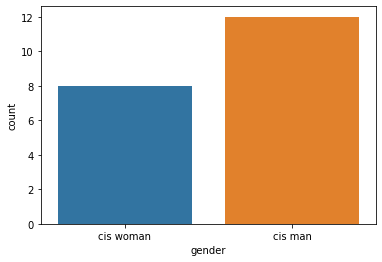

In [14]:
sns.countplot(data = most_ratings_slice, x = 'gender');

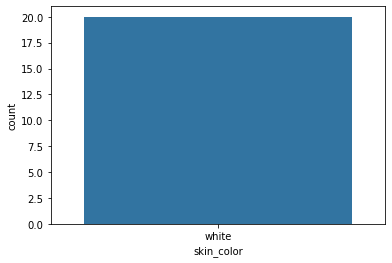

In [15]:
sns.countplot(data = most_ratings_slice, x = 'skin_color');

#### What is the genre breakdown in the top 20 most-rated books vs the bottom 20 least-rated books?

In [12]:
most_ratings_slice['title']

0                               Twilight (Twilight  #1)
1                   The Hobbit  or There and Back Again
2                                The Catcher in the Rye
3                  Angels & Demons (Robert Langdon  #1)
4     Harry Potter and the Prisoner of Azkaban (Harr...
5     Harry Potter and the Chamber of Secrets (Harry...
6     Harry Potter and the Order of the Phoenix (Har...
7     The Fellowship of the Ring (The Lord of the Ri...
8                                           Animal Farm
9     Harry Potter and the Half-Blood Prince (Harry ...
10                                    Lord of the Flies
11                                     Romeo and Juliet
12    The Lightning Thief (Percy Jackson and the Oly...
13                                      Of Mice and Men
14               The Da Vinci Code (Robert Langdon  #2)
15                                        The Alchemist
16                            The Giver (The Giver  #1)
17                                       The Boo

It's all fiction!   
Genres for top 20 titles:  
    Twilight: Romance, fantasy, young adult fiction (source: https://en.wikipedia.org/wiki/Twilight_(novel_series))  
    The Hobbit: High fantasy, Juvenile fantasy (source: https://en.wikipedia.org/wiki/The_Hobbit)  
    The Catcher in the Rye: Realistic fiction, Coming-of-age fiction (source: Wikipedia)  
    Angels & Demons/DaVinci Code: Mystery, Detective fiction, Conspiracy fiction, Thriller (source: Wikipedia)  
    Harry Potter books: Fantasy, drama, young adult fiction, mystery, thriller, Bildungsroman (source: Wikipedia)  
    Fellowship of the Ring: Fantasy (source: Wikipedia)  
    Animal Farm: Political satire (source: Wikipedia)   
    Lord of the Flies: Allegorical novel (source: Wikipedia)  
    Romeo and Juliet: Shakespearean tragedy (source: Wikipedia)  
    The Lightnight Thief: Fantasy, Young adult, Greek mythology (source: Wikipedia)  
    Of Mice and Men: social realism (https://www.sparknotes.com/lit/micemen/genre/)  
    The Alchemist: Novel, Drama, Quest, Fantasy Fiction, Adventure fiction (https://en.wikipedia.org/wiki/The_Alchemist_(novel))  
    The Giver: Young adult fiction, Dystopian novel, Science fiction (source: https://en.wikipedia.org/wiki/The_Giver)  
    The Book Thief: Novel-Historical Fiction (https://en.wikipedia.org/wiki/The_Book_Thief)  
    Little Women: Coming of age, Bildungsroman (source: https://en.wikipedia.org/wiki/Little_Women)  
    Jane Eyre: Novel, Victorian literature (source: https://en.wikipedia.org/wiki/Jane_Eyre)  

What are the most rated books vs. the most reviewed books?  
What are the gender/sex/race breakdown of the top 20 most rated books?  
What is the genre/category breakdown of top 20 most rated books?  
What is the breakdown between series/not a series of the top 20 most rated books?  


#### What is the series/not-a-series breakdown in the top 20 most-rated books vs the bottom 20 least-rated books?

In [21]:
most_ratings_slice['series']

0      True
1     False
2     False
3      True
4      True
5      True
6      True
7      True
8     False
9      True
10    False
11    False
12     True
13    False
14     True
15    False
16     True
17    False
18    False
19    False
Name: series, dtype: bool

#### What is the relationship between book length and being at either extreme in the most- or least-rated books?

In [26]:
most_ratings_slice['num_pages'].sort_values()

13    103
8     122
10    182
15    197
16    208
2     277
5     341
1     366
11    368
12    375
7     398
4     435
18    449
14    489
0     501
19    532
17    552
9     652
3     736
6     870
Name: num_pages, dtype: int64

In [27]:
most_ratings_slice['audio_hrs']

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: audio_hrs, dtype: float64

### What is the age range for the books in the top 20 most-rated books vs the bottom 20 least-rated books?

In [28]:
most_ratings_slice['title']

0                               Twilight (Twilight  #1)
1                   The Hobbit  or There and Back Again
2                                The Catcher in the Rye
3                  Angels & Demons (Robert Langdon  #1)
4     Harry Potter and the Prisoner of Azkaban (Harr...
5     Harry Potter and the Chamber of Secrets (Harry...
6     Harry Potter and the Order of the Phoenix (Har...
7     The Fellowship of the Ring (The Lord of the Ri...
8                                           Animal Farm
9     Harry Potter and the Half-Blood Prince (Harry ...
10                                    Lord of the Flies
11                                     Romeo and Juliet
12    The Lightning Thief (Percy Jackson and the Oly...
13                                      Of Mice and Men
14               The Da Vinci Code (Robert Langdon  #2)
15                                        The Alchemist
16                            The Giver (The Giver  #1)
17                                       The Boo

### Is there a variance between the top 20 most-rated and the top 20 most-reviewed?

In [29]:
most_ratings_slice['title']

0                               Twilight (Twilight  #1)
1                   The Hobbit  or There and Back Again
2                                The Catcher in the Rye
3                  Angels & Demons (Robert Langdon  #1)
4     Harry Potter and the Prisoner of Azkaban (Harr...
5     Harry Potter and the Chamber of Secrets (Harry...
6     Harry Potter and the Order of the Phoenix (Har...
7     The Fellowship of the Ring (The Lord of the Ri...
8                                           Animal Farm
9     Harry Potter and the Half-Blood Prince (Harry ...
10                                    Lord of the Flies
11                                     Romeo and Juliet
12    The Lightning Thief (Percy Jackson and the Oly...
13                                      Of Mice and Men
14               The Da Vinci Code (Robert Langdon  #2)
15                                        The Alchemist
16                            The Giver (The Giver  #1)
17                                       The Boo

In [30]:
most_reviews_slice = goodread_copy_df.sort_values(by='text_reviews_count', ascending=False).head(20)

In [31]:
most_reviews_slice['title']

9653                              Twilight (Twilight  #1)
4916                                       The Book Thief
996                             The Giver (The Giver  #1)
269                                         The Alchemist
9991                                  Water for Elephants
6772    The Lightning Thief (Percy Jackson and the Oly...
5042                                      Eat  Pray  Love
1942                                     The Glass Castle
1363                               The Catcher in the Rye
3       Harry Potter and the Prisoner of Azkaban (Harr...
292                The Da Vinci Code (Robert Langdon  #2)
480     The Curious Incident of the Dog in the Night-Time
4113    Harry Potter and the Chamber of Secrets (Harry...
2781                            Outlander (Outlander  #1)
1673                                             The Road
1591                  The Hobbit  or There and Back Again
1990                                          Animal Farm
2774          

### Other questions to look into:
#### What is the gender breakdown in the top 20 most-rated books vs the bottom 20 least-rated books?
#### What is the skin color breakdown in the top 20 most-rated books vs the bottom 20 least-rated books?
#### What is the fiction/non-fiction breakdown in the top 20 most-rated books vs the bottom 20 least-rated books?
#### What is the series/not-a-series breakdown in the top 20 most-rated books vs the bottom 20 least-rated books?
#### What is the relationship between book length and being at either extreme in the most- or least-rated books?

#### What gender is in the top 20 most-reviewed books vs the bottom 20 least-reviewed books?
#### What is the skin color breakdown in the top 20 most-reviewed books vs the bottom 20 least-reviewed books?
#### What is the fiction/non-fiction breakdown in the top 20 most-reviewed books vs the bottom 20 least-reviewed books?
#### What is the series/not-a-series breakdown in the top 20 most-reviewed books vs the bottom 20 least-reviewed books?
#### What is the relationship between book length and being at either extreme in the most- or least-rated books?